In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
from sklearn.model_selection import train_test_split

In [7]:
# Load the dataset
train_df = pd.read_csv('C:/Users/nesil.bor/Desktop/Folders/master/DI725/DI725-transformer-sentiment-analysis/data/raw/train.csv')
test_df = pd.read_csv('C:/Users/nesil.bor/Desktop/Folders/master/DI725/DI725-transformer-sentiment-analysis/data/raw/test.csv')

# Display basic information
print(f"Train set shape: {train_df.shape}")
print(f"Test set shape: {test_df.shape}")

# Display column names
print("Columns in the dataset:")
print(train_df.columns.tolist())

Train set shape: (970, 11)
Test set shape: (30, 11)
Columns in the dataset:
['issue_area', 'issue_category', 'issue_sub_category', 'issue_category_sub_category', 'customer_sentiment', 'product_category', 'product_sub_category', 'issue_complexity', 'agent_experience_level', 'agent_experience_level_desc', 'conversation']


In [8]:
# Check for missing values
print("\nMissing values in train set:")
print(train_df.isnull().sum())

# Display basic statistics
print("\nBasic statistics of train set:")
print(train_df.describe(include='all'))



Missing values in train set:
issue_area                     0
issue_category                 0
issue_sub_category             0
issue_category_sub_category    0
customer_sentiment             0
product_category               0
product_sub_category           0
issue_complexity               0
agent_experience_level         0
agent_experience_level_desc    0
conversation                   0
dtype: int64

Basic statistics of train set:
                       issue_area       issue_category  \
count                         970                  970   
unique                          6                   40   
top     Cancellations and returns  Return and Exchange   
freq                          277                   92   

                                       issue_sub_category  \
count                                                 970   
unique                                                109   
top     Verification requirement for mobile number or ...   
freq                       

In [11]:
# Display first few rows of the dataset
print(train_df.head())

# Display column names
print("\nColumn names:")
print(train_df.columns.tolist())

                  issue_area                        issue_category  \
0          Login and Account  Mobile Number and Email Verification   
1  Cancellations and returns                   Pickup and Shipping   
2  Cancellations and returns        Replacement and Return Process   
3          Login and Account       Login Issues and Error Messages   
4                      Order                 Order Delivery Issues   

                                  issue_sub_category  \
0  Verification requirement for mobile number or ...   
1           Reasons for being asked to ship the item   
2             Inability to click the 'Cancel' button   
3  Error message regarding exceeded attempts to e...   
4                       Delivery not attempted again   

                         issue_category_sub_category customer_sentiment  \
0  Mobile Number and Email Verification -> Verifi...            neutral   
1  Pickup and Shipping -> Reasons for being asked...            neutral   
2  Replacement an

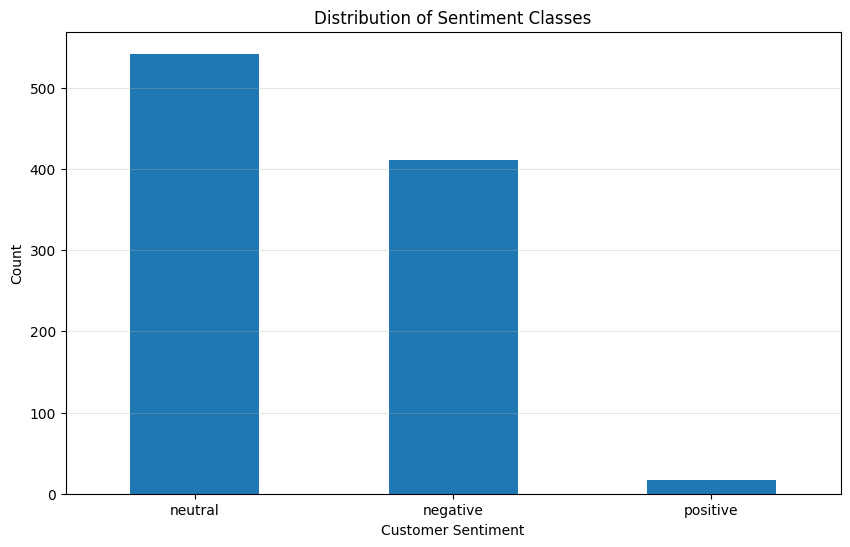


Sentiment distribution percentage:
customer_sentiment
neutral     55.876289
negative    42.371134
positive     1.752577
Name: count, dtype: float64


In [12]:
# Analyze sentiment distribution
plt.figure(figsize=(10, 6))
sentiment_counts = train_df['customer_sentiment'].value_counts()
sentiment_counts.plot(kind='bar')
plt.title('Distribution of Sentiment Classes')
plt.xlabel('Customer Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.show()

# Calculate sentiment distribution percentage
print("\nSentiment distribution percentage:")
sentiment_percentage = sentiment_counts / len(train_df) * 100
print(sentiment_percentage)

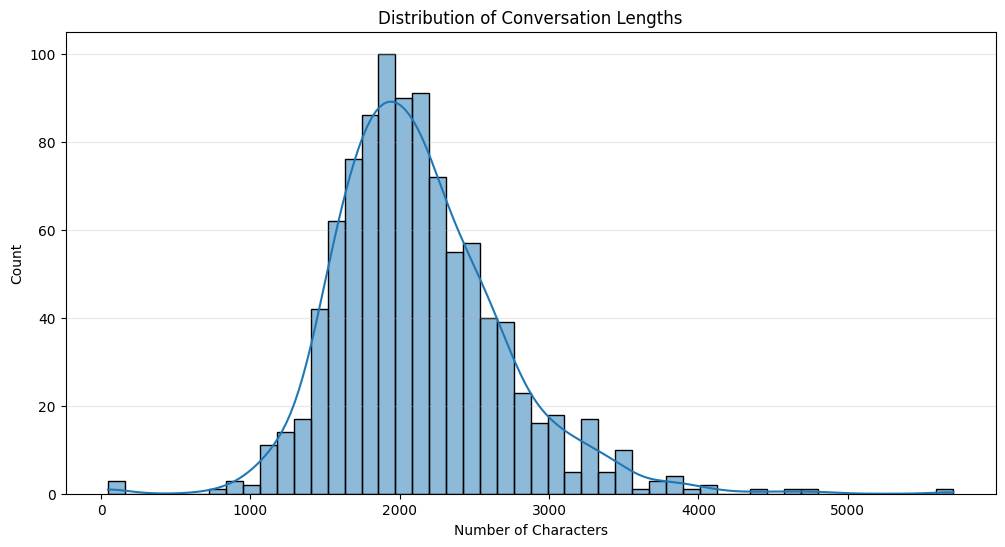

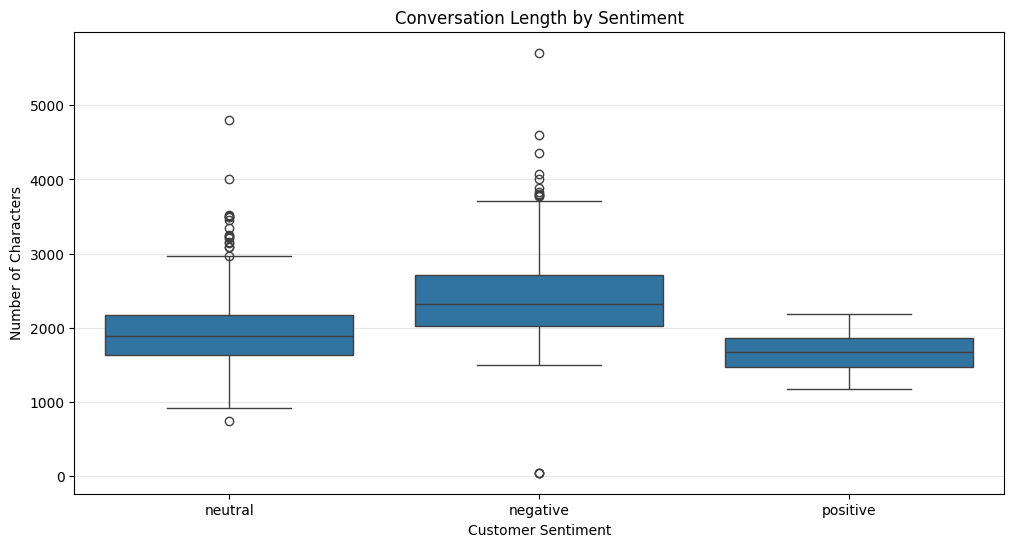

In [13]:
# Analyze text length in conversations
train_df['conversation_length'] = train_df['conversation'].apply(len)

plt.figure(figsize=(12, 6))
sns.histplot(train_df['conversation_length'], bins=50, kde=True)
plt.title('Distribution of Conversation Lengths')
plt.xlabel('Number of Characters')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.3)
plt.show()

# Analyze conversation lengths by sentiment
plt.figure(figsize=(12, 6))
sns.boxplot(x='customer_sentiment', y='conversation_length', data=train_df)
plt.title('Conversation Length by Sentiment')
plt.xlabel('Customer Sentiment')
plt.ylabel('Number of Characters')
plt.grid(axis='y', alpha=0.3)
plt.show()

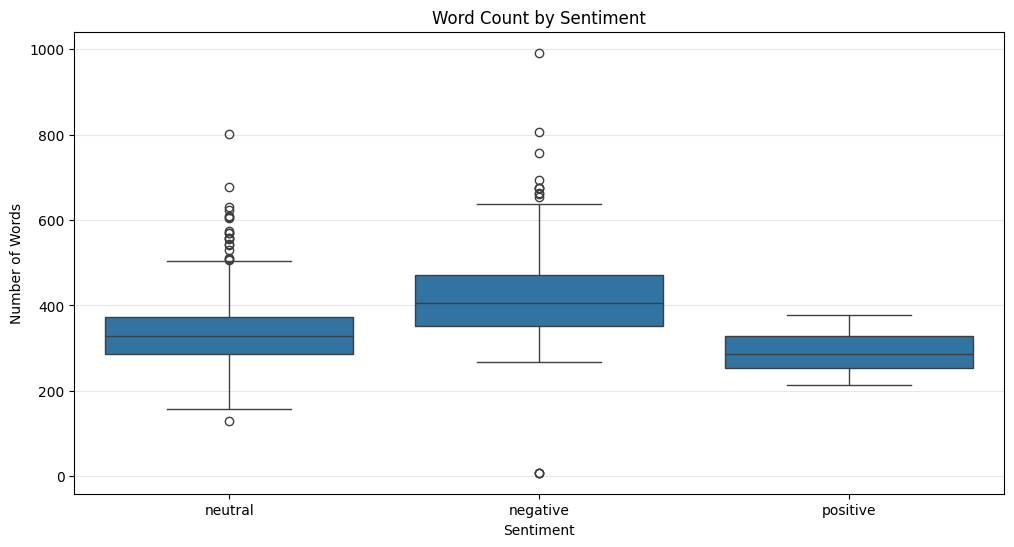

In [14]:
# Word count analysis
train_df['word_count'] = train_df['conversation'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(12, 6))
sns.boxplot(x='customer_sentiment', y='word_count', data=train_df)
plt.title('Word Count by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Number of Words')
plt.grid(axis='y', alpha=0.3)
plt.show()

# Check for any correlations between features
# This will depend on what other features are available in the dataset

# Save this commit
# git add notebooks/01_exploratory_data_analysis.ipynb
# git commit -m "Add exploratory data analysis notebook"
# git push origin main